In [74]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import sys
from gaussiandata import SyntheticTarget

import matplotlib.pyplot as matlab
%matplotlib inline

In [75]:
SEED = 666
number_of_gaussians = 10
ex = SyntheticTarget(seed=SEED, dist_components=number_of_gaussians)

N = 10000
M = 100
data = ex.draw_sample(N)
gamma = 2
kernel_matrix = rbf_kernel(data, gamma = gamma)

In [76]:
# K is the kernel matrix which is nbyn, n being the number of data points
# candidate indicies is an array of 0 to n-1, you might want to use a subset instead. TO CONSIDER.

def greedy_select_protos(K, candidate_indices, m, is_K_sparse=False):

    if len(candidate_indices) != np.shape(K)[0]:
        K = K[:,candidate_indices][candidate_indices,:]

    n = len(candidate_indices)

    # colsum = np.array(K.sum(0)).ravel() # same as rowsum
    if is_K_sparse:
        colsum = 2*np.array(K.sum(0)).ravel() / n
    else:
        colsum = 2*np.sum(K, axis=0) / n

    selected = np.array([], dtype=int)
    value = np.array([])
    for i in range(m):
        maxx = -sys.float_info.max
        argmax = -1
        candidates = np.setdiff1d(range(n), selected)

        s1array = colsum[candidates]
        if len(selected) > 0:
            temp = K[selected, :][:, candidates]
            if is_K_sparse:
                # s2array = temp.sum(0) *2
                s2array = temp.sum(0) * 2 + K.diagonal()[candidates]

            else:
                s2array = np.sum(temp, axis=0) *2 + np.diagonal(K)[candidates]

            s2array = s2array/(len(selected) + 1)

            s1array = s1array - s2array

        else:
            if is_K_sparse:
                s1array = s1array - np.log(np.abs(K.diagonal()[candidates]))
            else:
                s1array = s1array - np.log(np.abs(np.diagonal(K)[candidates]))

        argmax = candidates[np.argmax(s1array)]
        # print "max %f" %np.max(s1array)

        selected = np.append(selected, argmax)
        # value = np.append(value,maxx)
        KK = K[selected, :][:, selected]
        if is_K_sparse:
            KK = KK.todense()

        inverse_of_prev_selected = np.linalg.inv(KK)  # shortcut

    return candidate_indices[selected]

In [77]:
#print np.array(range(np.shape(kernel_matrix)[0]))
#print np.array(range(N))
prototype_indices = greedy_select_protos(kernel_matrix, candidate_indices = np.array(range(N)), m = M)

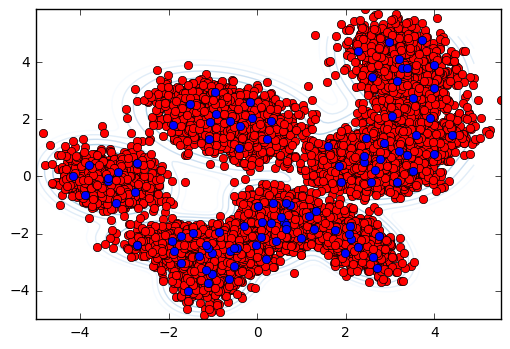

In [78]:
ex.plot()
matlab.plot(data[:N,0], data[:N,1], 'ro');
matlab.plot(data[prototype_indices,0], data[prototype_indices,1], 'bo');